## UmojaHack Africa 2021 #3: Financial Resilience Challenge (BEGINNER) by UmojaHack Africa

Can you predict if an individual will be able to make a payment in an emergency situation?

The objective of this challenge is to build a machine learning model to predict which individuals across Africa and around the world are most likely to be financially resilient.


![Umoja Hack](https://zindpublic.blob.core.windows.net/public/uploads/competition/image/151/thumb_cdf71374-9857-44bb-8216-5f8c67afb51f.png)

This is a simple R starter notebook to get you started with the Financial Resilience Challenge.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature engineering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

In [1]:
#Check version of R
R.version.string

[1] "R version 4.0.4 (2021-02-15)"

### Install packages

In [2]:
install.packages("fastDummies")
install.packages('naniar')
install.packages("caret")
install.packages("e1071")
install.packages('devtools')
library(devtools)
BINARY_URL="https://github.com/catboost/catboost/releases/download/v0.23/catboost-R-Linux-0.23.tgz"
devtools::install_url(BINARY_URL,args = c("--no-multiarch"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘data.table’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘plyr’, ‘visdat’, ‘viridis’, ‘UpSetR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: usethis





✔  checking for file ‘/tmp/RtmpIUSpMq/remotes3b58eca9cd/catboost/DESCRIPTION’
─  preparing ‘catboost’: (402ms)
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘catboost_0.23.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“1 components of `...` were not used.

We detected these problematic arguments:
* `args`

Did you misspecify an argument?”


### Importing libraries

In [3]:
# Import libraries
library(tidyverse)
library(fastDummies)
library(naniar)
library(catboost)
library(caret)
library(e1071)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




### Read files

In [26]:
# Load files
train = read.csv('/content/Train.csv')
test = read.csv('/content/Test.csv')
samplesubmission = read.csv('/content/SampleSubmission.csv')
variable_definations = read.csv('/content/VariableDefinitions.csv')

### Some basic EDA

In [27]:
# Preview first five rows of the train set
head(train)

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,⋯,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,ID_0000020532,Morocco,Middle East & North Africa (excluding high income),25550170,66,2,NA,NA,NA,NA,⋯,1,2,NA,1,2,2,2,1,1,0
2,ID_0000075765,Lebanon,Middle East & North Africa (excluding high income),4591023,44,2,NA,NA,2,2,⋯,1,2,NA,2,2,2,1,1,1,1
3,ID_0000085491,Morocco,Middle East & North Africa (excluding high income),25550170,29,1,1,1,2,2,⋯,1,1,2,2,2,2,NA,1,1,0
4,ID_0000144505,Canada,High income: OECD,30491168,44,1,1,1,1,1,⋯,1,1,2,1,2,NA,NA,1,NA,1
5,ID_0000214184,Mexico,Latin America & Caribbean (excluding high income),93002320,36,2,NA,NA,NA,NA,⋯,1,2,NA,1,2,2,2,1,1,1
6,ID_0000261077,Bahrain,High income: nonOECD,1135982,52,1,1,1,1,1,⋯,1,1,1,2,2,NA,NA,1,NA,1


In [28]:
# Preview first five rows of the test set
head(test)

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,⋯,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,ID_0000005111,Croatia,Europe & Central Asia (excluding high income),3557444,62,2,NA,NA,2,2,⋯,2,2,1,1,2,2,2,NA,1,1
2,ID_0000389416,Kazakhstan,Europe & Central Asia (excluding high income),12920168,32,2,NA,NA,NA,NA,⋯,2,2,2,NA,2,2,2,2,1,2
3,ID_0000634789,Costa Rica,Latin America & Caribbean (excluding high income),3791520,73,1,1,1,2,2,⋯,2,2,2,NA,2,1,2,1,1,1
4,ID_0000778100,Japan,High income: OECD,110566824,67,1,1,1,1,2,⋯,NA,1,1,2,1,1,NA,NA,1,NA
5,ID_0001123210,Morocco,Middle East & North Africa (excluding high income),25550170,32,1,1,1,2,2,⋯,1,2,2,NA,2,2,2,2,1,1
6,ID_0001249054,Lebanon,Middle East & North Africa (excluding high income),4591023,49,1,1,2,2,2,⋯,1,1,2,NA,2,2,2,1,1,1


In [29]:
# Preview first five rows of the sample submission file
head(samplesubmission)

,ID,target
,<chr>,<lgl>
1,ID_0000005111,NA
2,ID_0000389416,NA
3,ID_0000634789,NA
4,ID_0000778100,NA
5,ID_0001123210,NA
6,ID_0001249054,NA


In [30]:
# Preview variable definations
variable_definations

ID,Person.unique.random.identification,For.columns.Q1...Q28...Value.1...Yes..2...No..3.Don.t.Know.4...refused.to.answer
<chr>,<chr>,<lgl>
country,The country,NA
region,"Region of a given country,.i.e., South Asia, Europe, etc",NA
population,The population of the given country,NA
age,Individual age,NA
Q1,Has ATM/debit card,NA
Q2,Is the ATM connect to an account with your name?,NA
Q3,Purchased with the ATM,NA
Q4,Use of mobile or internet to make payments or send money,NA
Q5,Mobile/internet to check account balance,NA


In [31]:
# Check the shape of the train set, test and sample submission file
dim(train)
dim(test)
dim(samplesubmission)

[1] 104867     36

[1] 44943    35

[1] 44943     2

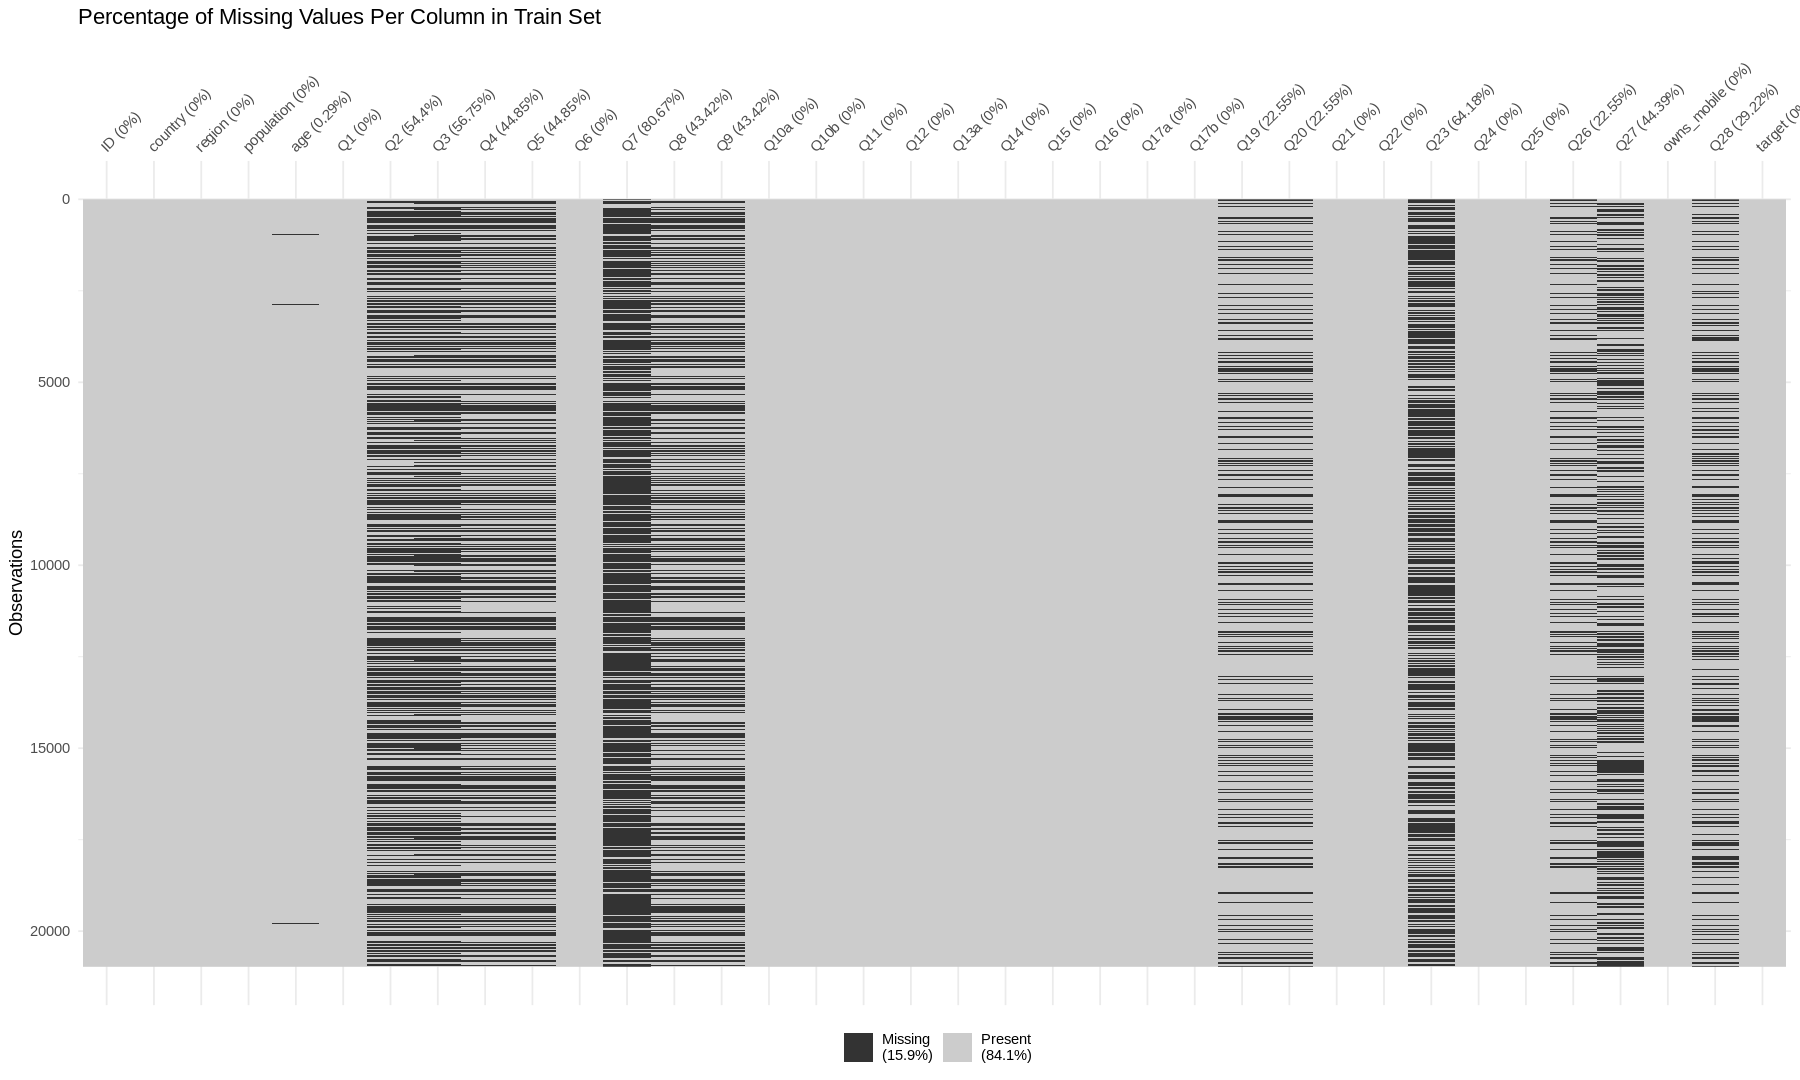

In [32]:
# Check if there any missing values in train set
options(repr.plot.width = 15, repr.plot.height = 9)
visdat::vis_miss(train%>%sample_frac(0.2)) + 
  labs(title = 'Percentage of Missing Values Per Column in Train Set')

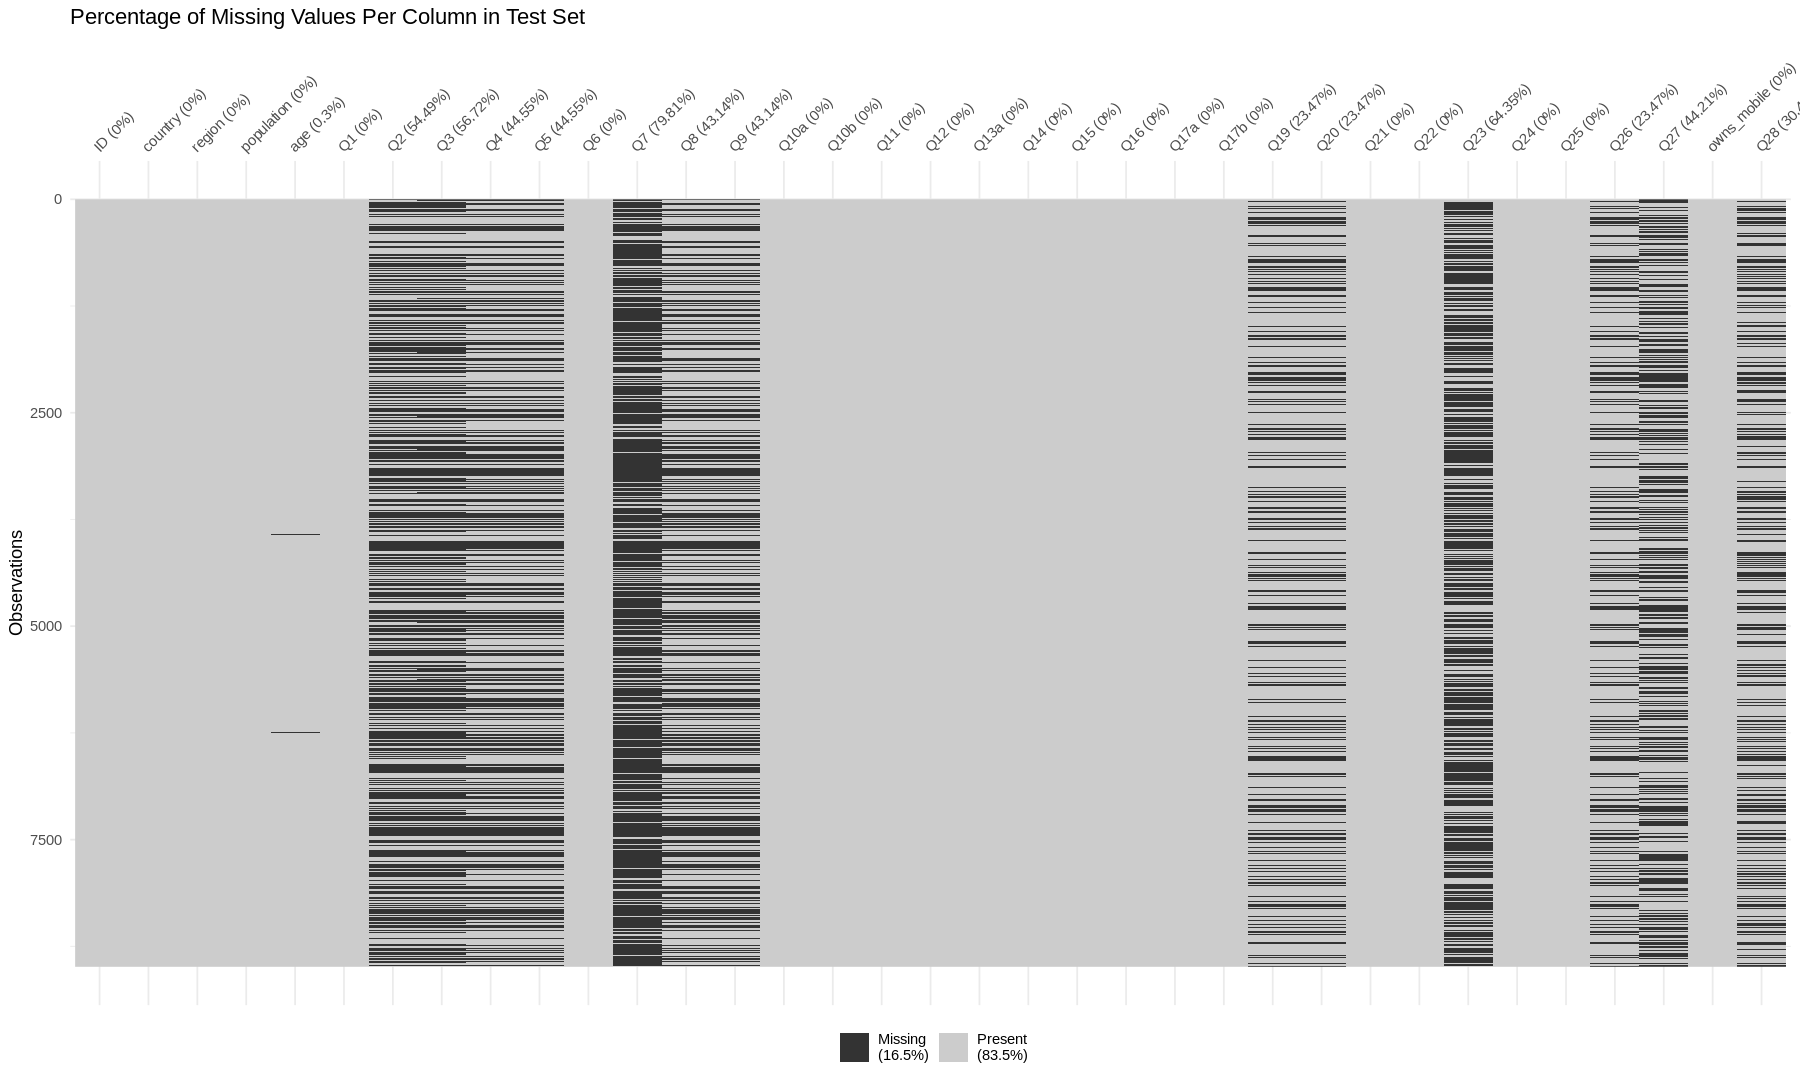

In [33]:
# Check if there any missing values in test set
options(repr.plot.width = 15, repr.plot.height = 9)
visdat::vis_miss(test%>%sample_frac(0.2)) + 
  labs(title = 'Percentage of Missing Values Per Column in Test Set')

## Distribution of the target variable

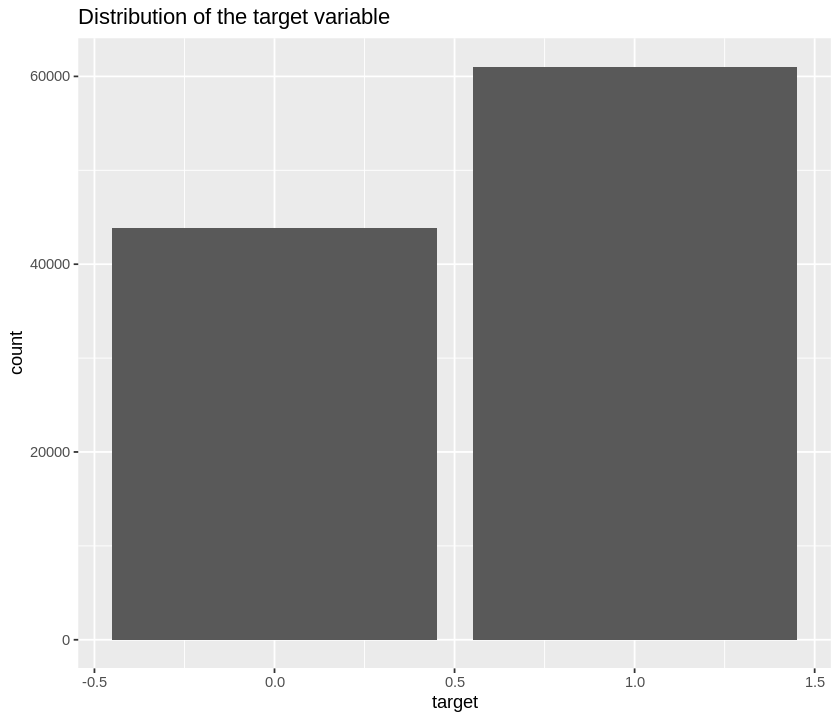

In [34]:
options(repr.plot.width = 7, repr.plot.height = 6)
ggplot(train, aes(x=target)) +
  geom_bar() +
  labs(title = "Distribution of the target variable")

This shows us that the target (Can you make a payment if you were in an emergency) is fairly balanced. The majority class in this dataset are people who can make a payment incase of an emergency

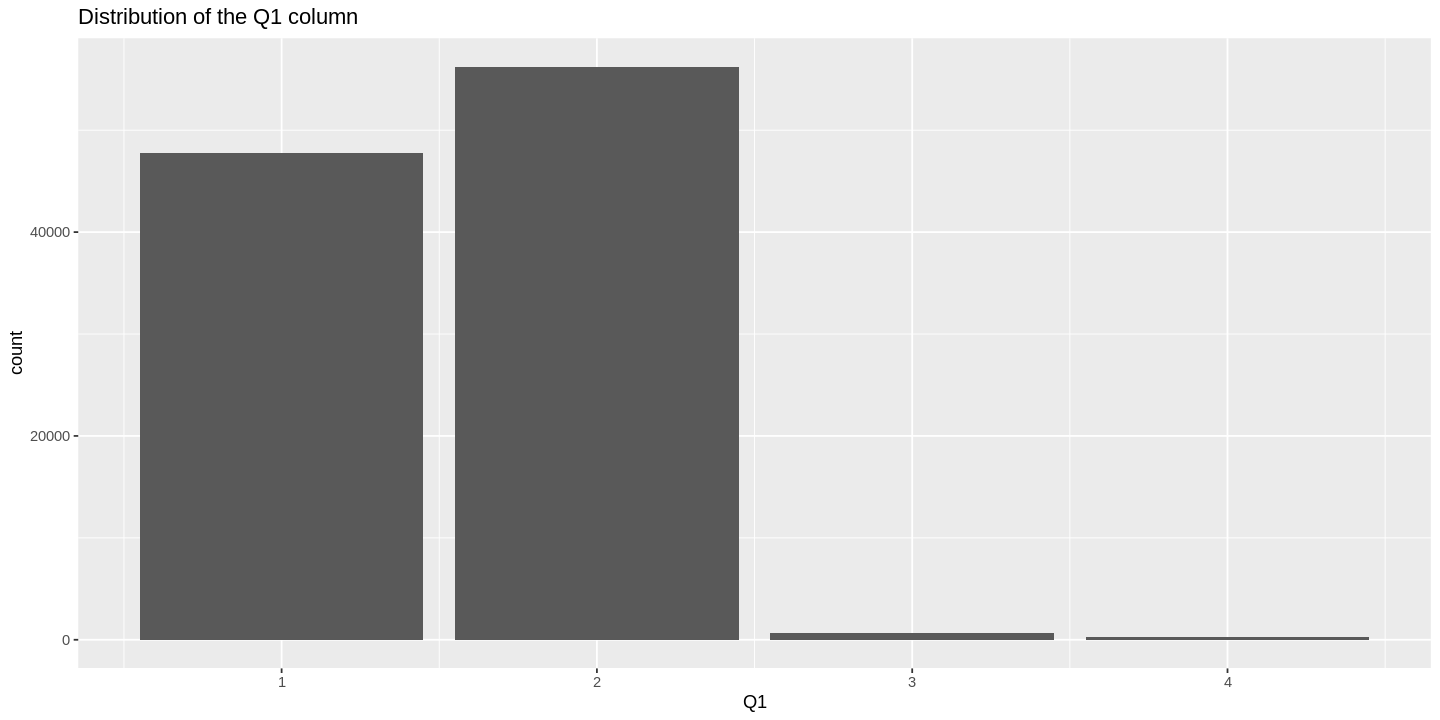

In [35]:
# Q1 - Has ATM/debit card
options(repr.plot.width = 12, repr.plot.height = 6)
ggplot(train, aes(x = Q1)) + 
  geom_bar() + 
  labs(title="Distribution of the Q1 column")

This shows that most people do not own a debit or ATM card

## Combine train and test set for easy preprocessing 

In [36]:
# Add target column to test for rbinding
test$target = NA

# To be used in splitting
ntrain = dim(train)[1]

all_data = rbind(train, test)
head(all_data)

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,⋯,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,ID_0000020532,Morocco,Middle East & North Africa (excluding high income),25550170,66,2,NA,NA,NA,NA,⋯,1,2,NA,1,2,2,2,1,1,0
2,ID_0000075765,Lebanon,Middle East & North Africa (excluding high income),4591023,44,2,NA,NA,2,2,⋯,1,2,NA,2,2,2,1,1,1,1
3,ID_0000085491,Morocco,Middle East & North Africa (excluding high income),25550170,29,1,1,1,2,2,⋯,1,1,2,2,2,2,NA,1,1,0
4,ID_0000144505,Canada,High income: OECD,30491168,44,1,1,1,1,1,⋯,1,1,2,1,2,NA,NA,1,NA,1
5,ID_0000214184,Mexico,Latin America & Caribbean (excluding high income),93002320,36,2,NA,NA,NA,NA,⋯,1,2,NA,1,2,2,2,1,1,1
6,ID_0000261077,Bahrain,High income: nonOECD,1135982,52,1,1,1,1,1,⋯,1,1,1,2,2,NA,NA,1,NA,1


In [37]:
# Total missing values
all_data %>%
  gather(key = "key", value = "val") %>%
  mutate(is.missing = is.na(val)) %>%
  group_by(key, is.missing) %>%
  summarise(num.missing = n()) %>%
  filter(is.missing==T) %>%
  select(-is.missing) %>%
  arrange(desc(num.missing))

`summarise()` has grouped output by 'key'. You can override using the `.groups` argument.



key,num.missing
<chr>,<int>
Q7,120295
Q23,96230
Q3,85248
Q2,81673
Q4,67806
Q5,67806
Q27,66275
Q8,65538
Q9,65538


In [38]:
# Check the datatypes of each column
glimpse(all_data)

Rows: 149,810
Columns: 36
$ ID          <chr> "ID_0000020532", "ID_0000075765", "ID_0000085491", "ID_000…
$ country     <chr> "Morocco", "Lebanon", "Morocco", "Canada", "Mexico", "Bahr…
$ region      <chr> "Middle East & North Africa (excluding high income)", "Mid…
$ population  <dbl> 25550170.0, 4591023.0, 25550170.0, 30491168.0, 93002320.0,…
$ age         <dbl> 66, 44, 29, 44, 36, 52, 61, 42, 41, 65, 31, 62, 54, 35, 57…
$ Q1          <int> 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1…
$ Q2          <dbl> NA, NA, 1, 1, NA, 1, 1, 1, 1, NA, 1, 1, 1, NA, NA, 1, NA, …
$ Q3          <dbl> NA, NA, 1, 1, NA, 1, 1, 1, 1, NA, 1, 1, 1, NA, NA, 1, NA, …
$ Q4          <dbl> NA, 2, 2, 1, NA, 1, 1, 1, 2, 2, 1, 2, 2, NA, NA, 1, 2, NA,…
$ Q5          <dbl> NA, 2, 2, 1, NA, 1, 1, 1, 1, 2, 1, 1, 2, NA, NA, 1, 2, NA,…
$ Q6          <int> 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1…
$ Q7          <dbl> NA, NA, NA, NA, NA, NA, 1, 1, 1, NA, NA, 1, NA, NA, NA, NA…
$ Q8          

In [39]:
# Change each column to its appriopriate datatype
num_cols = c('age', 'population')
cat_cols = c('country', 'region', 'owns_mobile', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10a', 'Q10b',
             'Q11', 'Q12', 'Q13a', 'Q14', 'Q15', 'Q16', 'Q17a', 'Q17b', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28')

all_data[cat_cols] = lapply(all_data[cat_cols], as.factor)

# Confirm whether the changes have been applied successfully
glimpse(all_data)

Rows: 149,810
Columns: 36
$ ID          <chr> "ID_0000020532", "ID_0000075765", "ID_0000085491", "ID_000…
$ country     <fct> "Morocco", "Lebanon", "Morocco", "Canada", "Mexico", "Bahr…
$ region      <fct> Middle East & North Africa (excluding high income), Middle…
$ population  <dbl> 25550170.0, 4591023.0, 25550170.0, 30491168.0, 93002320.0,…
$ age         <dbl> 66, 44, 29, 44, 36, 52, 61, 42, 41, 65, 31, 62, 54, 35, 57…
$ Q1          <fct> 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1…
$ Q2          <fct> NA, NA, 1, 1, NA, 1, 1, 1, 1, NA, 1, 1, 1, NA, NA, 1, NA, …
$ Q3          <fct> NA, NA, 1, 1, NA, 1, 1, 1, 1, NA, 1, 1, 1, NA, NA, 1, NA, …
$ Q4          <fct> NA, 2, 2, 1, NA, 1, 1, 1, 2, 2, 1, 2, 2, NA, NA, 1, 2, NA,…
$ Q5          <fct> NA, 2, 2, 1, NA, 1, 1, 1, 1, 2, 1, 1, 2, NA, NA, 1, 2, NA,…
$ Q6          <fct> 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1…
$ Q7          <fct> NA, NA, NA, NA, NA, NA, 1, 1, 1, NA, NA, 1, NA, NA, NA, NA…
$ Q8          

### Number of unique values per categorical column

In [40]:
# Check unique values for each categorical column
for (col in cat_cols){
  print(paste0(col, ':  ', length(unique(all_data[[col]]))))
}

[1] "country:  144"
[1] "region:  9"
[1] "owns_mobile:  5"
[1] "Q1:  4"
[1] "Q2:  5"
[1] "Q3:  5"
[1] "Q4:  5"
[1] "Q5:  5"
[1] "Q6:  4"
[1] "Q7:  5"
[1] "Q8:  5"
[1] "Q9:  5"
[1] "Q10a:  4"
[1] "Q10b:  4"
[1] "Q11:  4"
[1] "Q12:  4"
[1] "Q13a:  4"
[1] "Q14:  4"
[1] "Q15:  4"
[1] "Q16:  4"
[1] "Q17a:  4"
[1] "Q17b:  4"
[1] "Q19:  5"
[1] "Q20:  5"
[1] "Q21:  4"
[1] "Q22:  4"
[1] "Q23:  5"
[1] "Q24:  4"
[1] "Q25:  4"
[1] "Q26:  5"
[1] "Q27:  5"
[1] "Q28:  5"


### Filling in missing values
#### Missing values can be filled using different strategies
 - Mean
 - Max
 - Min
 - Mode
 -Drop observations with missing values
 - [Mice - Multivariate Imputation by Chained Equations](https://cran.r-project.org/web/packages/mice/index.html)
 - Others... do more reasearch

In [41]:
# Fill in missing values 
# Function to get mode
getmode <- function(x) { 
      ux <- sort(unique(x))
      ux[which.max(tabulate(match(x, ux)))] 
}

# Fill cat cols with mode
all_data[cat_cols] = lapply(all_data[cat_cols], function(x)
                    replace(x, is.na(x), getmode(x[!is.na(x)])))

# Fill age with mode
all_data[c("age")] = lapply(all_data[c("age")], function(x)
                    replace(x, is.na(x), getmode(x[!is.na(x)])))                    

# Confirm that there aren't any missing values
all_data[, -which(names(all_data) %in% c("target"))] %>%
  gather(key = "key", value = "val") %>%
  mutate(is.missing = is.na(val)) %>%
  group_by(key, is.missing) %>%
  summarise(num.missing = n()) %>%
  filter(is.missing==T) %>%
  select(-is.missing) %>%
  arrange(desc(num.missing))

Warning message:
“attributes are not identical across measure variables;
they will be dropped”
`summarise()` has grouped output by 'key'. You can override using the `.groups` argument.



key,num.missing
<chr>,<int>


### Feature Engineering
#### Try different strategies of dealing with categorical variables
 - One hot encoding
 - Label encoding
 - Target encoding
 - Reduce the number of unique values...

In [42]:
all_data = fastDummies::dummy_cols(all_data, cat_cols)
all_data = all_data[!sapply(all_data, function(x) class(x) == "AsIs")]

head(all_data)

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,⋯,Q26_3,Q26_4,Q27_1,Q27_2,Q27_3,Q27_4,Q28_1,Q28_2,Q28_3,Q28_4
,<chr>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ID_0000020532,Morocco,Middle East & North Africa (excluding high income),25550170,66,2,1,1,2,2,⋯,0,0,0,1,0,0,1,0,0,0
2,ID_0000075765,Lebanon,Middle East & North Africa (excluding high income),4591023,44,2,1,1,2,2,⋯,0,0,1,0,0,0,1,0,0,0
3,ID_0000085491,Morocco,Middle East & North Africa (excluding high income),25550170,29,1,1,1,2,2,⋯,0,0,0,1,0,0,1,0,0,0
4,ID_0000144505,Canada,High income: OECD,30491168,44,1,1,1,1,1,⋯,0,0,0,1,0,0,1,0,0,0
5,ID_0000214184,Mexico,Latin America & Caribbean (excluding high income),93002320,36,2,1,1,2,2,⋯,0,0,0,1,0,0,1,0,0,0
6,ID_0000261077,Bahrain,High income: nonOECD,1135982,52,1,1,1,1,1,⋯,0,0,0,1,0,0,1,0,0,0


In [43]:
# Separate train and test data from the combined dataframe
train_df = all_data[1:ntrain,]
test_df = all_data[(ntrain+1):dim(all_data)[1],]

# Check the shapes of the split dataset
dim(train_df)
dim(test_df)

[1] 104867    309

[1] 44943   309

### Training and making predictions
- Is catboost the best model for this challenge?
- Parameter tuning
 - Grid search, random search, perhaps bayesian search works better...

In [44]:
# Select main columns to be used in training
main_cols = names(train_df[, !names(train_df) %in% c("ID", "target")])

# Set seed for reproducability
set.seed(2021)

# Split data into train and test sets
train_index = createDataPartition(train_df$target, p=0.7, list=F)
data_train = train_df[train_index,]
data_test = train_df[-train_index,]

X_train = data_train[main_cols]
y_train = data_train$target
X_test = data_test[main_cols]
y_test = data_test$target

train_pool = catboost.load_pool(data = X_train, label = y_train)
test_pool = catboost.load_pool(data = X_test, label = y_test)

# Check size of X_train and X_test
dim(X_train)
dim(X_test)

[1] 73407   307

[1] 31460   307

In [45]:
# Train model
fit_params = list(iterations = 200,  loss_function = "Logloss", verbose = 50)
model = catboost.train(train_pool, test_pool, params = fit_params)

Learning rate set to 0.184416
0:	learn: 0.6569762	test: 0.6575075	best: 0.6575075 (0)	total: 688ms	remaining: 2m 16s
50:	learn: 0.5378400	test: 0.5421001	best: 0.5421001 (50)	total: 32.4s	remaining: 1m 34s
100:	learn: 0.5275629	test: 0.5366406	best: 0.5366406 (100)	total: 1m 6s	remaining: 1m 5s
150:	learn: 0.5206687	test: 0.5342740	best: 0.5342603 (149)	total: 1m 42s	remaining: 33.3s
199:	learn: 0.5156502	test: 0.5334524	best: 0.5334515 (198)	total: 2m 16s	remaining: 0us

bestTest = 0.5334514858
bestIteration = 198

Shrink model to first 199 iterations.


In [46]:
# Make predictions
y_pred = catboost.predict(model, test_pool, prediction_type = "Probability")

# Check the performance of your model
print(confusionMatrix(as.factor(ifelse(y_pred >= 0.5, 1, 0)), as.factor(data_test$target)))

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0  8640  4059
         1  4527 14234
                                         
               Accuracy : 0.7271         
                 95% CI : (0.7221, 0.732)
    No Information Rate : 0.5815         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.4365         
                                         
 Mcnemar's Test P-Value : 4.658e-07      
                                         
            Sensitivity : 0.6562         
            Specificity : 0.7781         
         Pos Pred Value : 0.6804         
         Neg Pred Value : 0.7587         
             Prevalence : 0.4185         
         Detection Rate : 0.2746         
   Detection Prevalence : 0.4037         
      Balanced Accuracy : 0.7171         
                                         
       'Positive' Class : 0              
                                      

[More on AUC score](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=AUC%20represents%20the%20probability%20that,has%20an%20AUC%20of%201.0.)

### Making predictions of the test set and creating a submission file

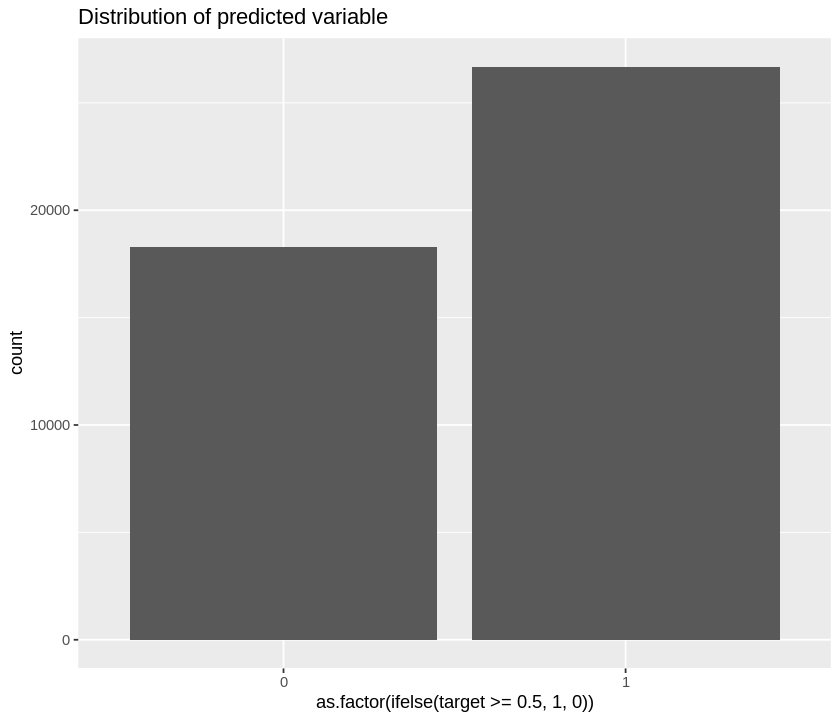

In [47]:
# Make prediction on the test set
test_df_pool = test_df[main_cols] %>% catboost.load_pool()
predictions = catboost.predict(model, test_df_pool, prediction_type = "Probability")

# Create a submission file
sub_file = setNames(samplesubmission,  names(samplesubmission))
sub_file$target = predictions

# Check the distribution of your predictions
options(repr.plot.width = 7, repr.plot.height = 6)
ggplot(sub_file, aes(x=as.factor(ifelse(target >= 0.5, 1, 0)))) +
  geom_bar() +
  labs(title = "Distribution of predicted variable")

In [48]:
# Create a csv file and upload to zindi 
write.csv(sub_file, 'Baseline.csv', row.names=FALSE)
head(sub_file)

,ID,target
,<chr>,<dbl>
1,ID_0000005111,0.7475457
2,ID_0000389416,0.2723872
3,ID_0000634789,0.4874117
4,ID_0000778100,0.9761812
5,ID_0001123210,0.4760182
6,ID_0001249054,0.8761913


###More Tips
- Thorough EDA and domain knowledge sourcing
- Re-group Categorical features 
- More Feature Engineering 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...

# ******************* GOOD LUCK!!! ***************************